In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import re
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options


In [26]:
chrome_options = Options()
chrome_options.add_argument("--headless")

service = Service("D:/pr_tools/chromedriver.exe")
driver = webdriver.Chrome(service=service, options=chrome_options)


In [27]:
base_url = "https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria"

In [28]:
all_properties = []
for page in range(1, 200):  # You can increase the range if needed
    try:
        url = base_url + "?page=" + str(page)
        print(f"Scraping {url}")
        driver.get(url)
        time.sleep(2)

        # Extract prices
        price_elements = driver.find_elements(By.XPATH, "//*[contains(text(), 'EGP')]")
        prices = []
        for el in price_elements:
            match = re.search(r"EGP\s[\d,]+", el.text)
            if match:
                prices.append(match.group())

        # Extract bedrooms
        bedroom_elements = driver.find_elements(By.XPATH, "//span[@aria-label='Beds']")
        bedrooms = [b.text for b in bedroom_elements]

        # Extract bathrooms
        bathroom_elements = driver.find_elements(By.XPATH, "//span[@aria-label='Bathrooms']")
        bathrooms = [b.text for b in bathroom_elements]

        # Extract area
        area_elements = driver.find_elements(By.XPATH, "//span[@aria-label='Area']")
        areas = [a.text for a in area_elements]

        # Extract locations
        location_elements = driver.find_elements(By.XPATH, "//span[@aria-label='Location']")
        locations = [loc.text for loc in location_elements if loc.text.strip() != ""]

        # Combine data
        for i in range(min(len(prices), len(bedrooms), len(bathrooms), len(areas), len(locations))):
            item = {
                "price": prices[i],
                "bedrooms": bedrooms[i],
                "bathrooms": bathrooms[i],
                "area": areas[i],
                "location": locations[i]
            }
            all_properties.append(item)

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

# Close the driver
driver.quit()

Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=1
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=2
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=3
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=4
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=5
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=6
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=7
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=8
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=9
Scraping https://www.dubizzle.com.eg/en/properties/apartments-duplex-for-sale/alexandria?page=10
Scraping https://www.dubizzle.com.eg/en

In [30]:
print("\nExtracted properties:")
for item in all_properties:
    print(item)


Extracted properties:
{'price': 'EGP 5,460,000', 'bedrooms': '3', 'bathrooms': '3', 'area': '168 sqm', 'location': 'Valore Antoniades, Smoha•'}
{'price': 'EGP 5,460,000', 'bedrooms': '3', 'bathrooms': '2', 'area': '141 sqm', 'location': 'Murooj, Smoha•'}
{'price': 'EGP 5,499,000', 'bedrooms': '3', 'bathrooms': '3', 'area': '218 sqm', 'location': 'Valore Antoniades, Smoha•'}
{'price': 'EGP 5,499,000', 'bedrooms': '3', 'bathrooms': '1', 'area': '100 sqm', 'location': 'Smoha, Alexandria•'}
{'price': 'EGP 6,867,000', 'bedrooms': '3', 'bathrooms': '2', 'area': '153 sqm', 'location': 'Alex West, Agami•'}
{'price': 'EGP 6,867,000', 'bedrooms': '2', 'bathrooms': '1', 'area': '105 sqm', 'location': 'Sporting, Alexandria•'}
{'price': 'EGP 2,750,000', 'bedrooms': '3', 'bathrooms': '2', 'area': '145 sqm', 'location': 'Stanley, Alexandria•'}
{'price': 'EGP 2,750,000', 'bedrooms': '3', 'bathrooms': '1', 'area': '120 sqm', 'location': 'Sidi Beshr, Alexandria•'}
{'price': 'EGP 5,750,000', 'bedrooms':

In [32]:
# Function to create a connection to SQL Server using Windows Authentication
def create_connection():
    return pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=DESKTOP-AJ3RLS3\\SQLEXPRESS;'  
        'DATABASE=tools;'  # Change to your actual database name
        'Trusted_Connection=yes;'  # Use Windows Authentication
    )


In [1]:
def insert_data_to_sql(properties):
    conn = create_connection()
    cursor = conn.cursor()

    # Create the table if it does not exist
    cursor.execute("""
        IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='properties' AND xtype='U')
        CREATE TABLE properties (
            id INT IDENTITY(1,1) PRIMARY KEY,
            price NVARCHAR(50),
            bedrooms NVARCHAR(50),
            bathrooms NVARCHAR(50),
            area NVARCHAR(50),
            location NVARCHAR(255)
        )
    """)
    conn.commit()

    # Insert the scraped data into the table
    for prop in properties:
        cursor.execute("""
            INSERT INTO properties (price, bedrooms, bathrooms, area, location)
            VALUES (?, ?, ?, ?, ?)
        """, prop['price'], prop['bedrooms'], prop['bathrooms'], prop['area'], prop['location'])

    conn.commit()
    conn.close()


In [ ]:
# Insert the data into SQL Server
insert_data_to_sql(all_properties)
print("\n Data has been successfully inserted into SQL Server.")


In [1]:
import pandas as pd
import pyodbc
# Function to create a connection to SQL Server
def create_connection():
    return pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=DESKTOP-AJ3RLS3\\SQLEXPRESS;'  # Change to your actual server name
        'DATABASE=tools;'  # Change to your actual database name
        'Trusted_Connection=yes;'  # Use Windows Authentication
    )

# Function to fetch data from SQL Server into a pandas DataFrame
def fetch_data_from_sql():
    conn = create_connection()
    query = "SELECT * FROM properties;"  # Adjust the query if needed
    df = pd.read_sql(query, conn)  # Fetch data and load it into a DataFrame
    conn.close()  # Close the connection
    return df

# Fetch data and print the DataFrame
df = fetch_data_from_sql()

C:\Users\Mmahm\AppData\Local\Temp\ipykernel_1080\3424333926.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)  # Fetch data and load it into a DataFrame


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

EXPLORING AND PREPROCESSING

In [3]:
df=df.head(2234) #preKnoweldge from the site

In [4]:
df.head()

,id,price,bedrooms,bathrooms,area,location
0,1,"EGP 5,460,000",3,3,168 sqm,"Valore Antoniades, Smoha•"
1,2,"EGP 5,460,000",3,2,141 sqm,"Murooj, Smoha•"
2,3,"EGP 5,499,000",3,3,218 sqm,"Valore Antoniades, Smoha•"
3,4,"EGP 5,499,000",3,1,100 sqm,"Smoha, Alexandria•"
4,5,"EGP 6,867,000",3,2,153 sqm,"Alex West, Agami•"


In [5]:
df.drop(columns='id',axis=1,inplace=True)

In [10]:
df.duplicated().sum()

np.int64(209)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum() # No nulls

price        0
bedrooms     0
bathrooms    0
area         0
location     0
dtype: int64

In [9]:
df['price_EGP'] = df['price'].str.replace('EGP', '', regex=False)
df['price_EGP'] = df['price_EGP'].str.replace(',', '', regex=False)
df['price_EGP'] = df['price_EGP'].str.strip()
df['price_EGP'] = df ['price_EGP'].astype(float)
df.drop(columns='price',inplace=True)

In [10]:
df['area'] = df['area'].str.replace('sqm', '', regex=False)  # Remove 'sqm'
df['area'] = df['area'].str.replace(',', '', regex=False)    # Remove commas
df['area'] = df['area'].str.strip()                          # Remove whitespace
df['area'] = df['area'].astype(float)                        # Convert to float


In [11]:
df['bedrooms'].value_counts()

bedrooms
3      1209
2       578
4       170
1        28
5        28
6         9
7         2
10+       1
Name: count, dtype: int64

In [12]:
df = df[df['bedrooms'] != '10+']

In [13]:
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)


In [14]:
df['bathrooms'].value_counts()

bathrooms
1    790
2    768
3    406
4     42
5     12
6      5
8      1
Name: count, dtype: int64

In [15]:
df  = df[df['bathrooms']  < 6 ]

In [16]:
df['bathrooms'].value_counts()

bathrooms
1    790
2    768
3    406
4     42
5     12
Name: count, dtype: int64

In [17]:
df['bedrooms'].value_counts()

bedrooms
3    1209
2     577
4     169
1      28
5      26
6       8
7       1
Name: count, dtype: int64

In [18]:
df  = df[df['bedrooms']  < 6 ]
print(df['bedrooms'].value_counts())



bedrooms
3    1209
2     577
4     169
1      28
5      26
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Bathrooms')

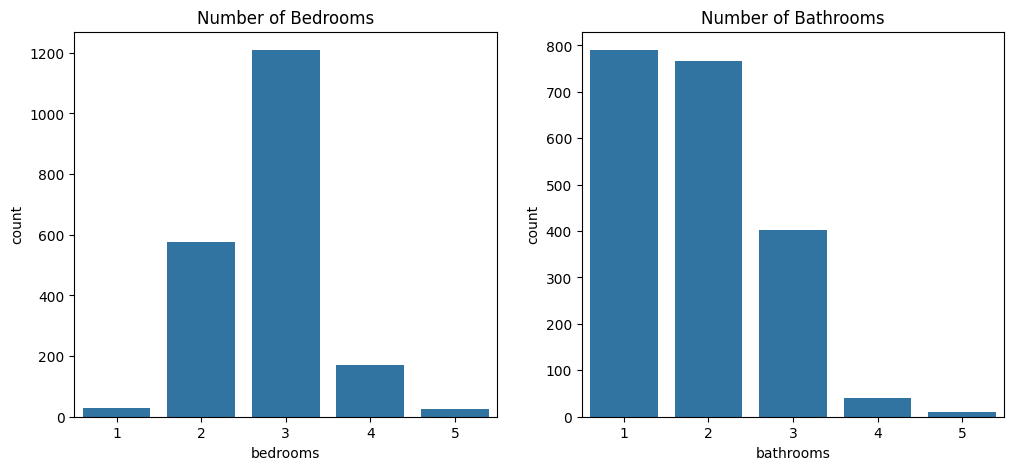

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='bedrooms')
plt.title('Number of Bedrooms')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='bathrooms')
plt.title('Number of Bathrooms')

"The dataset consists of property prices in EGP, the number of bedrooms and bathrooms, the name of the combound or location, and the flat size in square meters (sqm)" (Alex Only)

understand data and trace noisy data

In [20]:
Q1 = np.percentile(df['area'], 25)
Q3 = np.percentile(df['area'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]


Text(0.5, 1.0, 'distrubition of area')

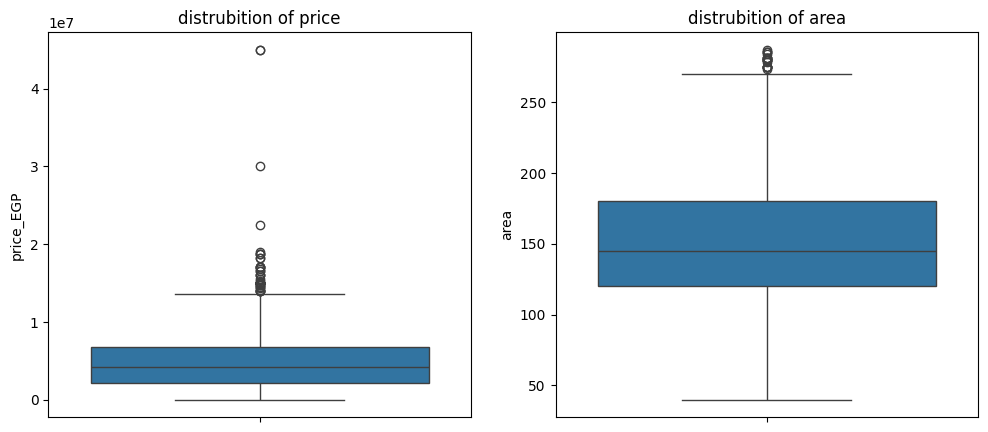

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='price_EGP')
plt.title('distrubition of price')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='area')
plt.title('distrubition of area')

In [22]:
corr1=df.corr(numeric_only=True) 

<Axes: >

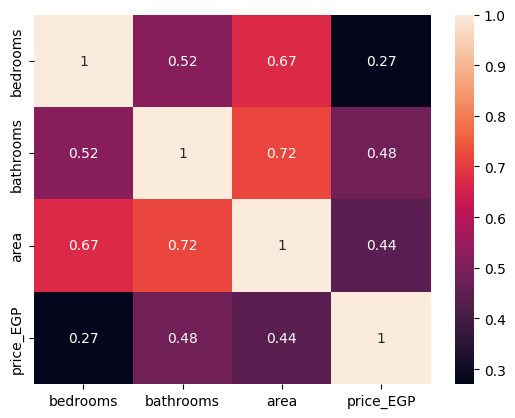

In [23]:
sns.heatmap(corr1,annot=True)

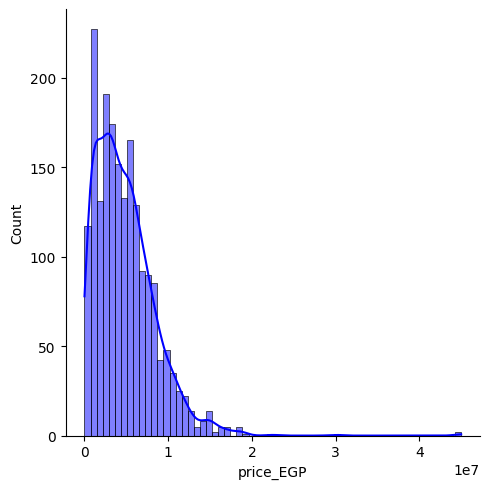

In [24]:
sns.displot(data=df, x='price_EGP', kde=True , color='b')

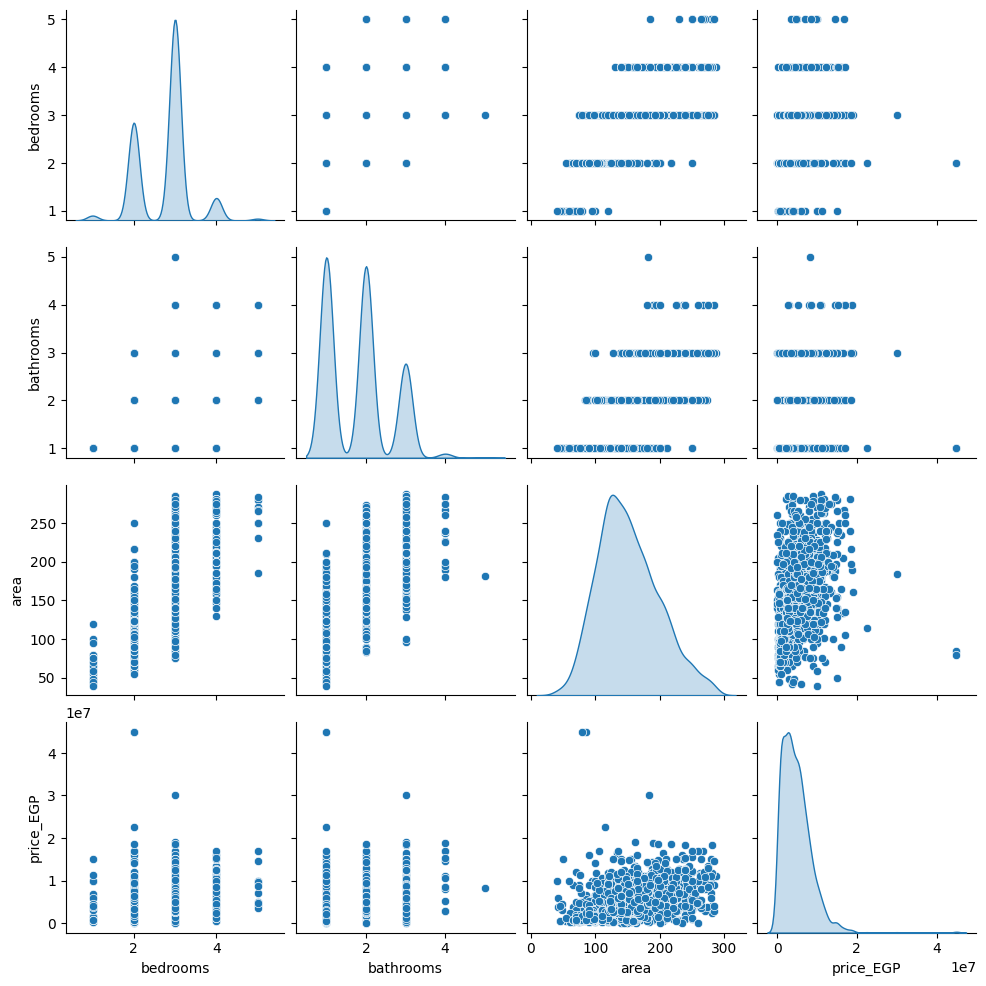

In [25]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
df['price_per_sqft'] = df['price_EGP'] / df['area']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1)
df['log_price'] = np.log(df['price_EGP'])  # only if price is skewed
df['log_area'] = np.log(df['area'])

df['price_per_sqft'] = df.groupby('location')['price_per_sqft'].transform('mean')
df['bed_bath_ratio'] = df.groupby('location')['bed_bath_ratio'].transform('mean')
df['log_price'] = df.groupby('location')['log_price'].transform('mean')

<Axes: >

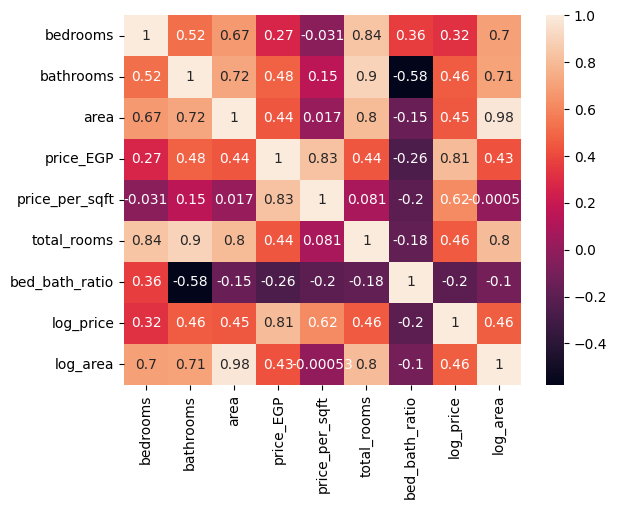

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [28]:
import re

def clean_location(text):
    match = re.match(r'\s*([^,]+)', text)
    if match:
        result = match.group(1)
        result = re.sub(r'\s+', '', result)
        result = result.lower()
        return result
    return ''

df['location'] = df['location'].apply(clean_location)

df.head()

,bedrooms,bathrooms,area,location,price_EGP,price_per_sqft,total_rooms,bed_bath_ratio,log_price,log_area
0,3,3,168.0,valoreantoniades,5460000.0,32500.000000,6,0.75,15.512959,5.123964
1,3,2,141.0,murooj,5460000.0,38723.404255,5,1.00,15.512959,4.948760
2,3,3,218.0,valoreantoniades,5499000.0,25224.770642,6,0.75,15.520077,5.384495
3,3,1,100.0,smoha,5499000.0,54990.000000,4,1.50,15.520077,4.605170
4,3,2,153.0,alexwest,6867000.0,44882.352941,5,1.00,15.742238,5.030438


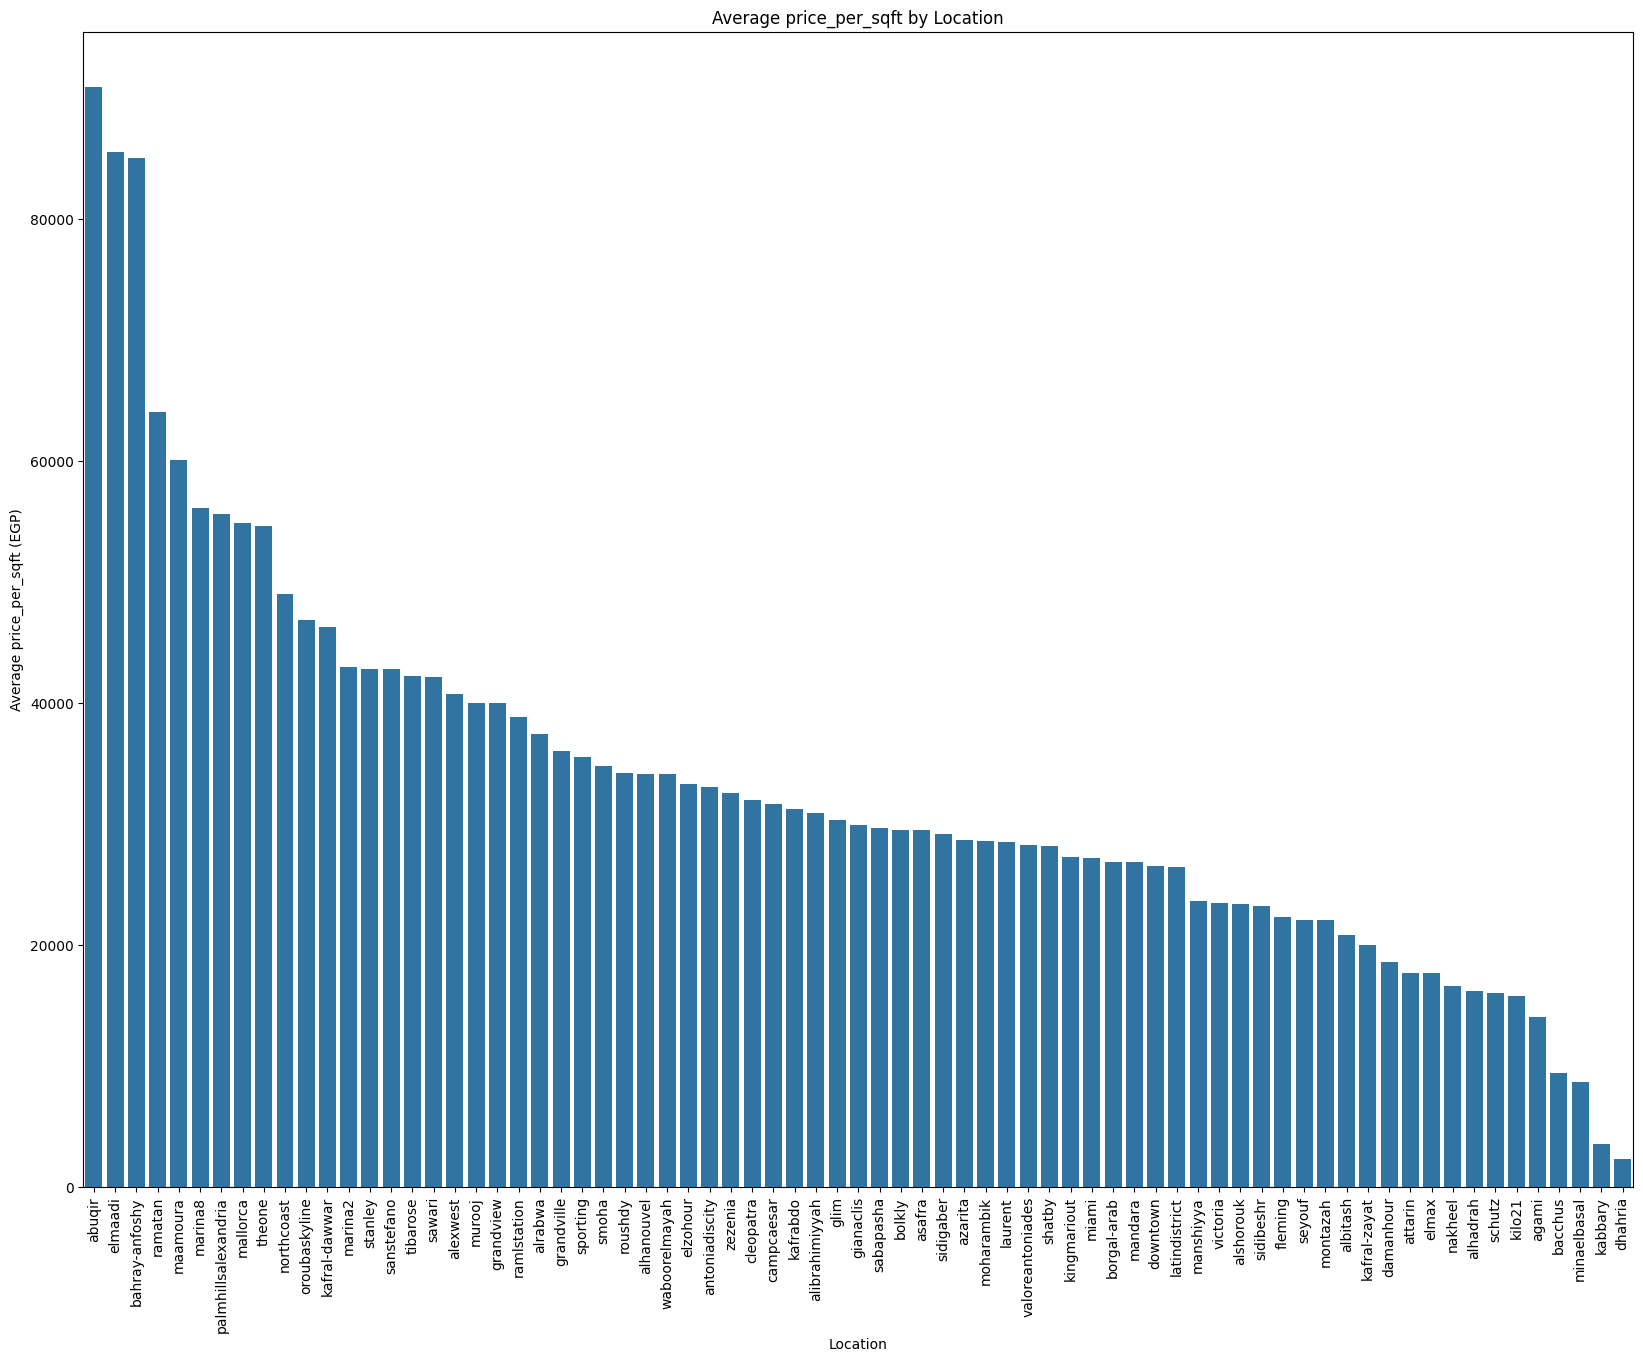

In [29]:
mean_place = df.groupby('location')['price_per_sqft'].mean().reset_index().sort_values('price_per_sqft',ascending=False)

plt.figure(figsize=(20,15))
sns.barplot(x='location', y='price_per_sqft', data=mean_place)
plt.xlabel('Location')
plt.ylabel('Average price_per_sqft (EGP)')
plt.title('Average price_per_sqft by Location')
plt.xticks(rotation=90)
plt.show()


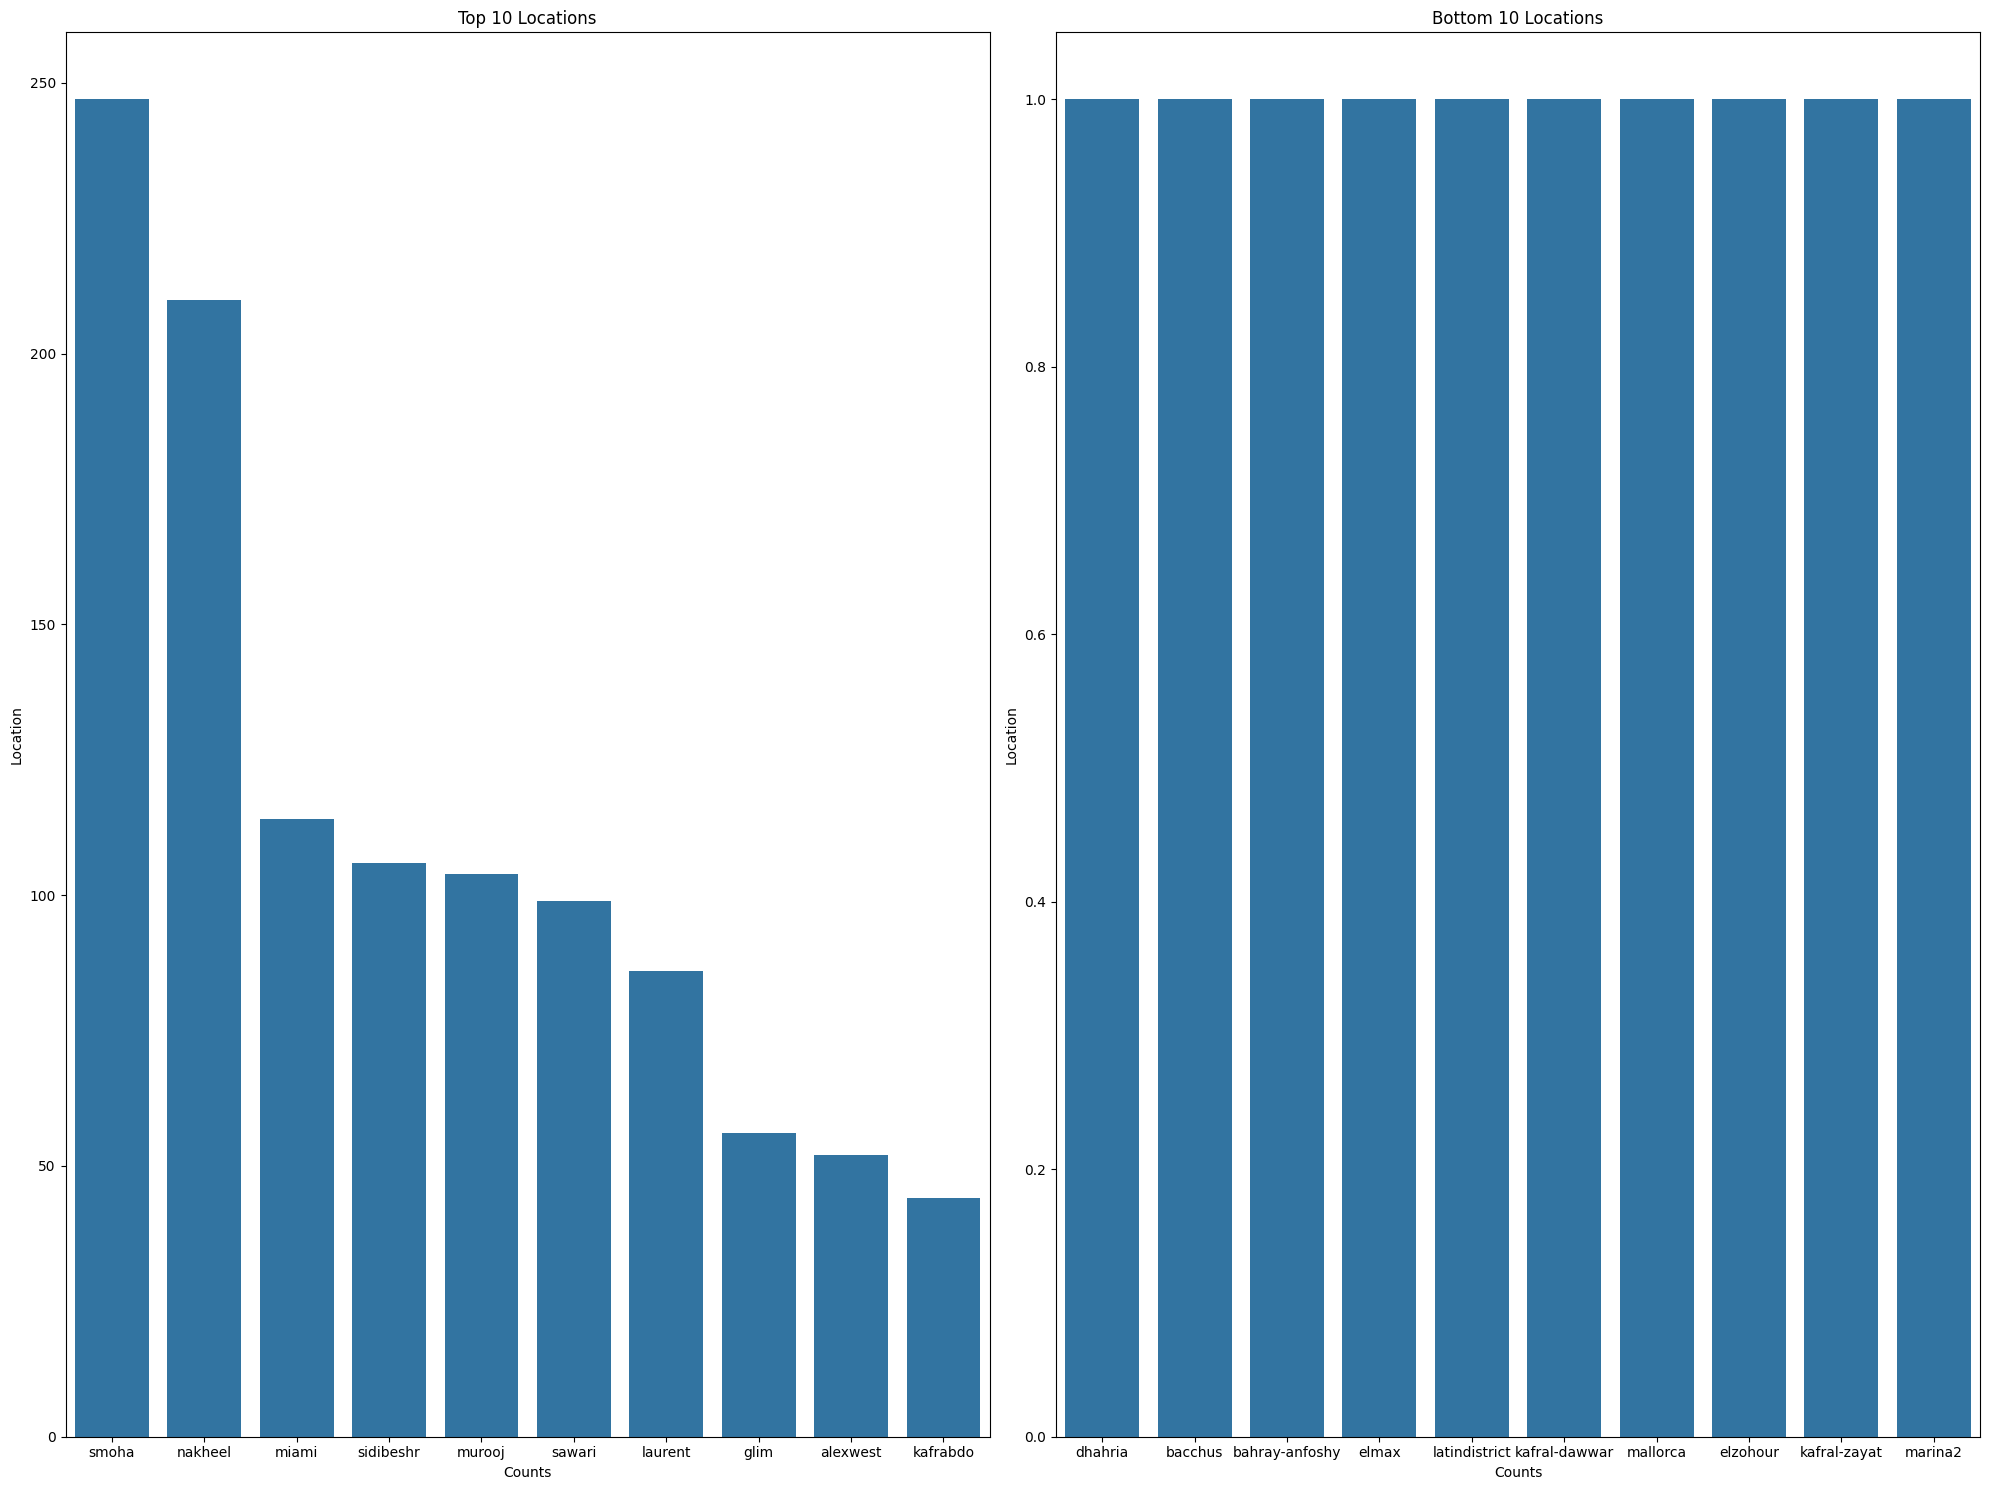

In [30]:
counts = df['location'].value_counts()

top_10 = counts.head(10)
bottom_10 = counts.tail(10)

plt.figure(figsize=(20,15))

plt.subplot(1, 2, 1)
sns.barplot(y=top_10.values, x=top_10.index)
plt.title('Top 10 Locations')
plt.xlabel('Counts')
plt.ylabel('Location')

plt.subplot(1, 2, 2)
sns.barplot(y=bottom_10.values, x=bottom_10.index)
plt.title('Bottom 10 Locations')
plt.xlabel('Counts')
plt.ylabel('Location')

plt.tight_layout()
plt.show()

In [31]:
from sqlalchemy import create_engine

server = 'DESKTOP-AJ3RLS3\\SQLEXPRESS'
database = 'tools'
driver = 'ODBC Driver 17 for SQL Server'  

connection_string = f"mssql+pyodbc://@{server}/{database}?driver={driver}"

engine = create_engine(connection_string)


df.to_sql('alex_houses', con=engine, if_exists='replace', index=False)

40

In [32]:
query = "SELECT * FROM alex_houses"   

df = pd.read_sql(query, con=engine)

df.head()

,bedrooms,bathrooms,area,location,price_EGP,price_per_sqft,total_rooms,bed_bath_ratio,log_price,log_area
0,3,3,168.0,valoreantoniades,5460000.0,32500.000000,6,0.75,15.512959,5.123964
1,3,2,141.0,murooj,5460000.0,38723.404255,5,1.00,15.512959,4.948760
2,3,3,218.0,valoreantoniades,5499000.0,25224.770642,6,0.75,15.520077,5.384495
3,3,1,100.0,smoha,5499000.0,54990.000000,4,1.50,15.520077,4.605170
4,3,2,153.0,alexwest,6867000.0,44882.352941,5,1.00,15.742238,5.030438


In [33]:
df.to_csv('cleaned_proprities.csv')

In [34]:
df.head()

,bedrooms,bathrooms,area,location,price_EGP,price_per_sqft,total_rooms,bed_bath_ratio,log_price,log_area
0,3,3,168.0,valoreantoniades,5460000.0,32500.000000,6,0.75,15.512959,5.123964
1,3,2,141.0,murooj,5460000.0,38723.404255,5,1.00,15.512959,4.948760
2,3,3,218.0,valoreantoniades,5499000.0,25224.770642,6,0.75,15.520077,5.384495
3,3,1,100.0,smoha,5499000.0,54990.000000,4,1.50,15.520077,4.605170
4,3,2,153.0,alexwest,6867000.0,44882.352941,5,1.00,15.742238,5.030438


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=df.drop(columns=['price_EGP','location'])
y = df["price_EGP"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle=True)

In [49]:
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred=polymodel.predict(X_test)

In [52]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)


,Y_Test,Y_Pred,Residuals
998,6300000.0,6.719257e+06,-4.192568e+05
1622,2800000.0,3.988752e+06,-1.188752e+06
611,890000.0,2.011399e+05,6.888601e+05
514,5000000.0,5.411590e+06,-4.115897e+05
413,4500000.0,5.539365e+06,-1.039365e+06


In [53]:
from sklearn import metrics

from joblib import dump, load


Poly_MAE = metrics.mean_absolute_error(y_test,y_pred)
Poly_MSE = metrics.mean_squared_error(y_test,y_pred)
Poly_RMSE = np.sqrt(Poly_MSE)

pd.DataFrame([Poly_MAE, Poly_MSE ,Poly_RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,1.087313e+06
MSE,2.409260e+12
RMSE,1.552179e+06


In [43]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.883650975285339


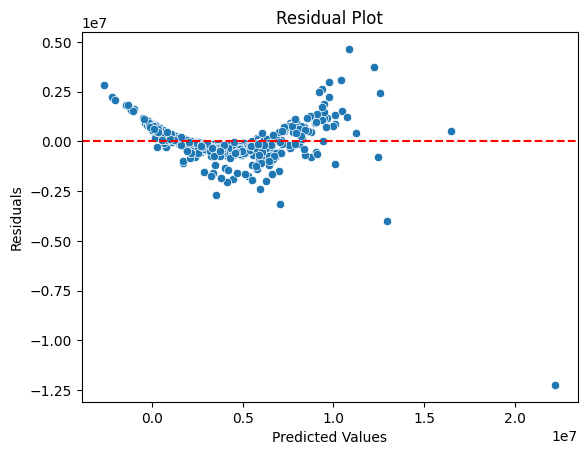

In [44]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


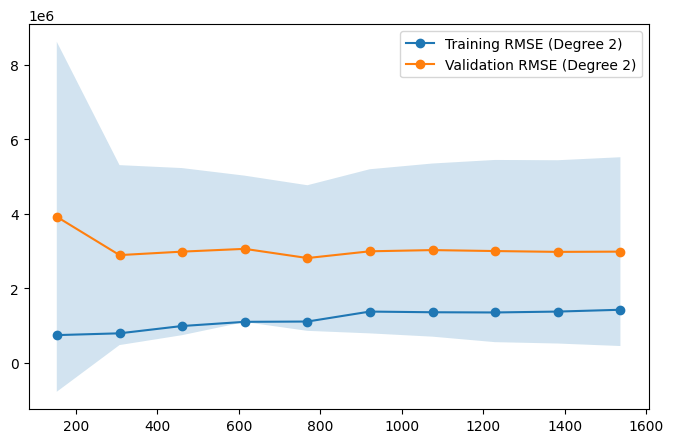

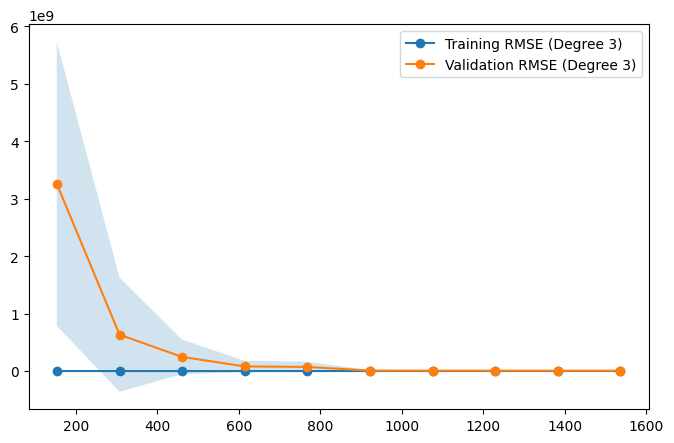

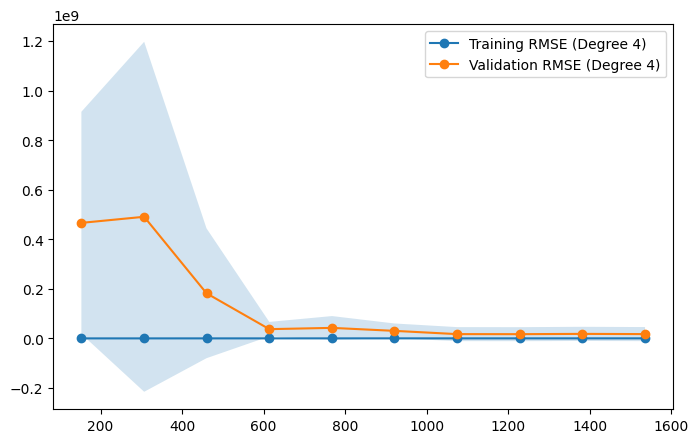

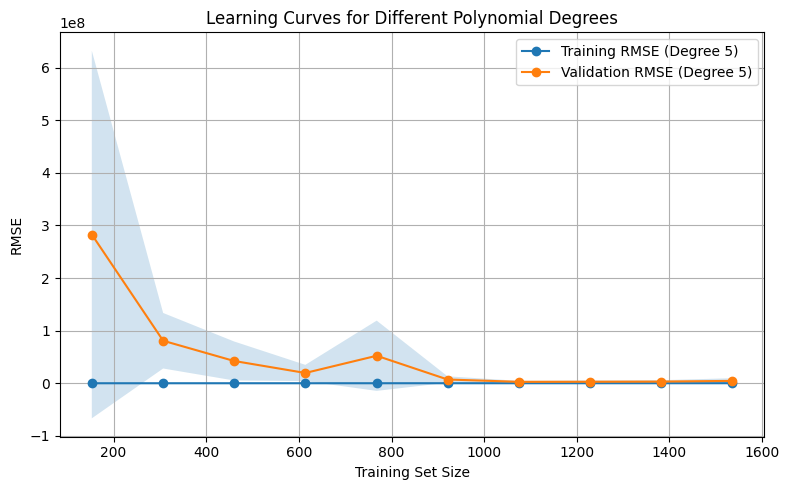

The best degree is 2 with the lowest validation RMSE of 2981129.649315835


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example feature matrix X and target vector y
# X, y should be defined beforehand with your dataset

best_degree = None
best_val_rmse = float('inf')  # Initialize with a high value
train_sizes_all = np.linspace(0.1, 1.0, 10)

# Loop over degrees from 2 to 5
for degree in range(2, 6):
    # Define the model pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Compute learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=train_sizes_all,
        cv=5,
        scoring='neg_mean_squared_error',
        shuffle=True,
        random_state=42
    )

    # Convert negative MSE to positive RMSE
    train_rmse = np.sqrt(-train_scores)
    val_rmse = np.sqrt(-val_scores)

    # Calculate the mean validation RMSE
    mean_val_rmse = val_rmse.mean(axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label=f'Training RMSE (Degree {degree})')
    plt.plot(train_sizes, mean_val_rmse, 'o-', label=f'Validation RMSE (Degree {degree})')
    plt.legend()

    plt.fill_between(train_sizes,
                     mean_val_rmse - val_rmse.std(axis=1),
                     mean_val_rmse + val_rmse.std(axis=1),
                     alpha=0.2)

    # Update the best degree if this one has lower validation RMSE
    if mean_val_rmse[-1] < best_val_rmse:
        best_val_rmse = mean_val_rmse[-1]
        best_degree = degree

# Finalizing the plot
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curves for Different Polynomial Degrees')
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the best degree
print(f"The best degree is {best_degree} with the lowest validation RMSE of {best_val_rmse}")


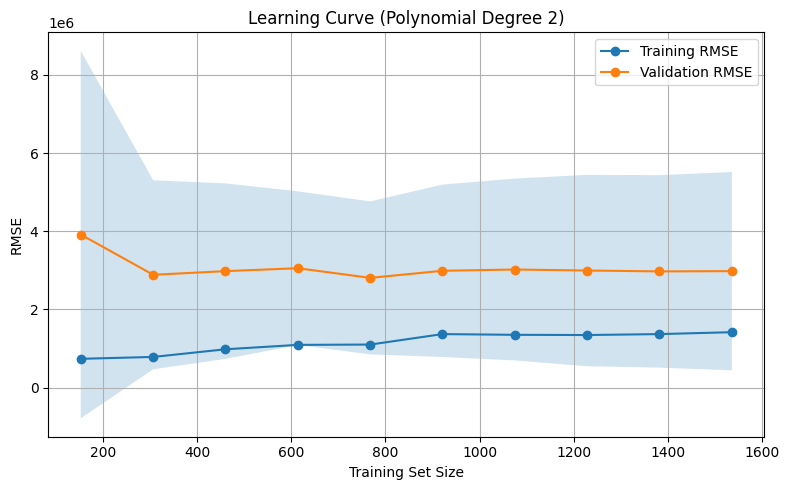

R^2 score for Polynomial Degree 2: 0.8291270961021115


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse.mean(axis=1), 'o-', label='Validation RMSE')
plt.fill_between(train_sizes,
                 val_rmse.mean(axis=1) - val_rmse.std(axis=1),
                 val_rmse.mean(axis=1) + val_rmse.std(axis=1),
                 alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title(f'Learning Curve (Polynomial Degree {degree})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"R^2 score for Polynomial Degree {degree}: {r2}")
